In [1]:
import glob
import re

import scipy.interpolate as interpolate
from matplotlib import pyplot as plt
import numpy as np

from utils import Graph

# Different pressure levels
P_v = [2, 7, 15]
N_v = [1.15e19, 4.02e19, 8.61e19]
colors = ['C0', 'C1', 'C3']
colors_th = ['C0--', 'C1--', 'C3--']

# Different cross section databases
databases = ['Biagi', 'BSR', 'Puech']
style = ['-', '-.', ':']

def log_interp1d(xx, yy, kind='linear'):
    logx = np.log10(xx)
    logy = np.log10(yy)
    lin_interp = interpolate.interp1d(logx, logy, kind=kind)
    log_interp = lambda zz: np.power(10.0, lin_interp(np.log10(zz)))
    return log_interp

The below imports and processes the simulation runs.

In [2]:
file_tree = [[{}, {}, {}], [{}, {}, {}]]

file_tree_total = [[[{}, {}, {}], [{}, {}, {}]], [[{}, {}, {}], [{}, {}, {}]], [[{}, {}, {}], [{}, {}, {}]]]

E_vals = [[[[], [], []], [[], [], []]], [[[], [], []], [[], [], []]], [[[], [], []], [[], [], []]]]
alpha_vals = [[[[], [], []], [[], [], []]], [[[], [], []], [[], [], []]], [[[], [], []], [[], [], []]]]
M_vals = [[[[], [], []], [[], [], []]], [[[], [], []], [[], [], []]], [[[], [], []], [[], [], []]]]

v_vals = [[[[], [], []], [[], [], []]], [[[], [], []], [[], [], []]], [[[], [], []], [[], [], []]]]
v_devs = [[[[], [], []], [[], [], []]], [[[], [], []], [[], [], []]], [[[], [], []], [[], [], []]]]

eV_vals = [[[[], [], []], [[], [], []]], [[[], [], []], [[], [], []]], [[[], [], []], [[], [], []]]]
eV_devs = [[[[], [], []], [[], [], []]], [[[], [], []], [[], [], []]], [[[], [], []], [[], [], []]]]

for k, db in enumerate(databases):
    for j, d in enumerate([1, 3]):
        for i, p in enumerate(P_v):
            for file in glob.glob(f'gar-townsend-coef/{db}/{p}-psi/{d}d/*.txt'):
                key = int(re.search(r'(\d*)(?:V)', file).group(1))
                if (key in file_tree_total[k][j][i]):
                    file_tree_total[k][j][i][key].append(file)
                else:
                    file_tree_total[k][j][i][key] = [file]

            for key, value in sorted(file_tree_total[k][j][i].items()):
                group = Graph(value)
                
                E_vals[k][j][i].append(key)
            
                v_vals[k][j][i].append(group.drift_mean())
                v_devs[k][j][i].append(group.drift_std_dev())
                
                eV_vals[k][j][i].append(group.eV_mean())
                eV_devs[k][j][i].append(group.eV_std_dev())

The below cells plots mean electron energy across the different datasets and pressures.

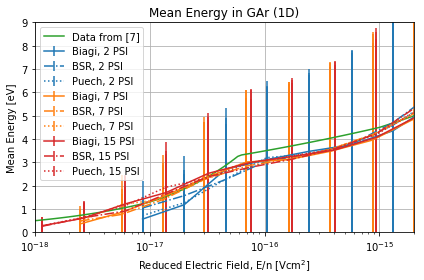

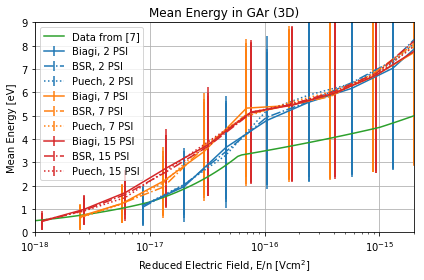

In [7]:
x = [1e-18, 1e-17, 6e-17, 1e-15, 2e-15]
y = [0.5, 1.3, 3.3, 4.5, 5]

data = log_interp1d(x, y)
x_vs = np.logspace(-18, np.log10(2e-15), 100)

for j, d in enumerate([1, 3]):
    # plt.rcParams['font.size'] = 14
    # plt.rcParams['font.family'] = 'serif'
    # fig = plt.figure(figsize=(6, 6))
    
    plt.plot(x_vs, data(x_vs), 'C2', label='Data from [7]')
    
    for i, p in enumerate(P_v):
        for k, db in enumerate(databases):
            plt.errorbar([E / N_v[i] for E in E_vals[k][j][i]], eV_vals[k][j][i], fmt=colors[i], yerr=eV_devs[k][j][i], linestyle=style[k], label=f'{db}, {p} PSI')
            
    plt.xlabel('Reduced Electric Field, E/n [Vcm$^2$]')
    plt.ylabel('Mean Energy [eV]')
    
    plt.xscale('log')
    plt.xlim(1e-18, 2e-15)
    plt.ylim(0, 9)
    
    plt.title(f'Mean Energy in GAr ({d}D)')
    
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # plt.savefig(f'gar_energy_{d}d.pdf', bbox_inches='tight')

The below cells plots drift velocity across the different datasets and pressures.

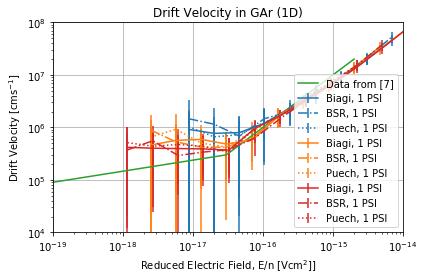

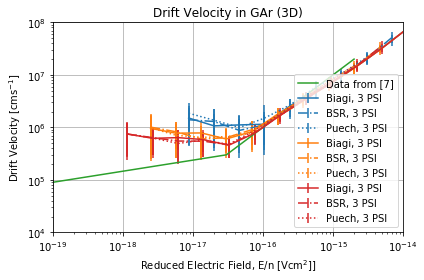

In [6]:
x = [1e-19, 3e-17, 2e-15]
y = [9e4, 3e5, 2e7]

data = log_interp1d(x, y)
x_vs = np.logspace(-19, np.log10(2e-15), 100)

for j, d in enumerate([1, 3]):
    # plt.rcParams['font.size'] = 14
    # plt.rcParams['font.family'] = 'serif'
    # fig = plt.figure(figsize=(12, 6))
    
    plt.plot(x_vs, data(x_vs), 'C2', label='Data from [7]')
    
    for i, p in enumerate(P_v):
        for k, db in enumerate(databases):
            plt.errorbar([E / N_v[i] for E in E_vals[k][j][i]], [v * 1e2 for v in v_vals[k][j][i]], fmt=colors[i], yerr=[v * 1e2 for v in v_devs[k][j][i]], linestyle=style[k], label=f'{db}, {d} PSI')
            
    plt.xlabel('Reduced Electric Field, E/n [Vcm$^2$]]')
    plt.ylabel('Drift Velocity [cms$^{-1}$]')
    plt.title(f'Drift Velocity in GAr ({d}D)')
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(1e-19, 1e-14)
    plt.ylim(1e4, 1e8)
    
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    # plt.savefig(f'gar_drift_{d}d.pdf', bbox_inches='tight')